In [10]:
# This project involves web-scraping the average housing prices from 50 Chinese cities in 2023 from Anjuke (a website documenting Chinese cities' housing prices).
# Also, this project involves a simple descriptive analysis and drawing a simple boxplot for the web-scraped dataset.
# The file and data can be accessed on my Github (https://github.com/GGGGUKIM/Python-project/tree/main). The file and data are my own work, please do not distribute them.

Note: you may need to restart the kernel to use updated packages.


In [176]:
# Import packages

from pyquery import PyQuery as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Get the website

url = 'https://www.anjuke.com/fangjia/quanguo2023/'

session = HTMLSession()
r = session.get(url)

In [28]:
# Define a function

def get_text_link_from_sel(sel):
    mylist = []
    try:
        results = r.html.find(sel)
        for result in results:
            mytext = result.text
            mylink = list(result.absolute_links)[0]
            mylist.append((mytext, mylink))
        return mylist
    except:
        return None

In [31]:
# Automatically get data and test

sel= 'body > div.main-content > div.avger.clearfix > div.fjlist-wrap.clearfix > div:nth-child(1) > ul > li'

print(get_text_link_from_sel(sel))

[('2023年北京房价 60541元/㎡ 0.09%↑', 'http://www.anjuke.com/fangjia/beijing2023/'), ('2023年深圳房价 57618元/㎡ 0.18%↓', 'http://www.anjuke.com/fangjia/shenzhen2023/'), ('2023年厦门房价 53601元/㎡ 0.41%↓', 'http://www.anjuke.com/fangjia/xm2023/'), ('2023年广州房价 34566元/㎡ 0.88%↓', 'http://www.anjuke.com/fangjia/guangzhou2023/'), ('2023年杭州房价 32741元/㎡ 1.27%↓', 'http://www.anjuke.com/fangjia/hangzhou2023/'), ('2023年三亚房价 31736元/㎡ 0.03%↓', 'http://www.anjuke.com/fangjia/sanya2023/'), ('2023年南京房价 26862元/㎡ 0.12%↓', 'http://www.anjuke.com/fangjia/nanjing2023/'), ('2023年宁波房价 25537元/㎡ 0.58%↓', 'http://www.anjuke.com/fangjia/nb2023/'), ('2023年义乌房价 24872元/㎡ 0.51%↓', 'http://www.anjuke.com/fangjia/yiwu2023/'), ('2023年珠海房价 22561元/㎡ 0.35%↑', 'http://www.anjuke.com/fangjia/zh2023/'), ('2023年东莞房价 22442元/㎡ 0.34%↓', 'http://www.anjuke.com/fangjia/dg2023/'), ('2023年福州房价 21583元/㎡ 0.48%↓', 'http://www.anjuke.com/fangjia/fz2023/'), ('2023年苏州房价 21305元/㎡ 0.07%↓', 'http://www.anjuke.com/fangjia/suzhou2023/'), ('2023年昆山房价 19394元/㎡ 0.34

In [90]:
# Transfer the data into a data frame and save

housing = pd.DataFrame(get_text_link_from_sel(sel))
housing.columns = ['text', 'link']
housing

housing.to_csv('raw.csv',index=False)

In [168]:
# Split the string values
df1 = pd.read_csv("raw.csv", sep = ",") 
df2 = df1['text'].str.split(' ',3, expand=True)
df2 = df2.iloc[:,[0,1]]

df3 = df2.iloc[:,0].str.split('年',2, expand=True)
df3 = df3.iloc[:,1].str.split('房',2, expand=True)
df3 = df3.iloc[:,0]

df4 = df2.iloc[:,1].str.split('元',2, expand=True)
df4 = df4.iloc[:,0]

# Merge and get a final dataset with an additional column indicating the region that each city is located
house = pd.concat([df3,df4], axis=1)
house.columns = ['city', 'price(Yuan/m2)']
house['price(Yuan/m2)'] = house['price(Yuan/m2)'].astype(int)
house['region']=['North','South','South','South','South','South','South','South','South','South','South','South','South','South','South','South','South','South','South','South','North','South','North','North',
                'South','South','Southwest','South','South','South','South','South','South','South','Northeast','Northwest','South','North','North','South','North','South','South','South','Northwest','South',
                 'Southwest','South','Northwest','Southwest']

house.to_csv('house.csv',index=False)
house

,city,price(Yuan/m2),region
0,北京,60541,North
1,深圳,57618,South
2,厦门,53601,South
3,广州,34566,South
4,杭州,32741,South
5,三亚,31736,South
6,南京,26862,South
7,宁波,25537,South
8,义乌,24872,South
9,珠海,22561,South


In [170]:
# Some summary features
house.groupby(['region']).count()

,price(Yuan/m2)
region,
North,21402.714286
Northeast,14107.000000
Northwest,12750.000000
South,20582.138889
Southwest,13076.666667


In [171]:
house.groupby(['region']).mean('price(Yuan/m2)')

,price(Yuan/m2)
region,
North,21402.714286
Northeast,14107.000000
Northwest,12750.000000
South,20582.138889
Southwest,13076.666667


In [172]:
house.groupby(['region']).max('price(Yuan/m2)')

,price(Yuan/m2)
region,
North,60541
Northeast,14107
Northwest,14081
South,57618
Southwest,15363


In [173]:
house.groupby(['region']).min('price(Yuan/m2)')

,price(Yuan/m2)
region,
North,12948
Northeast,14107
Northwest,11711
South,11774
Southwest,11621


<AxesSubplot:title={'center':'price(Yuan/m2)'}, xlabel='region'>

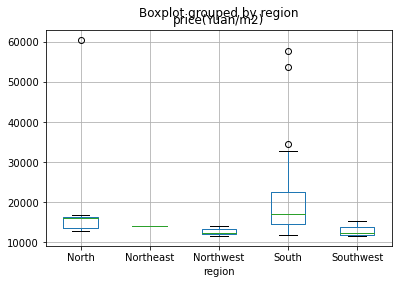

In [214]:
# A simple boxplot
house.boxplot(column=['price(Yuan/m2)'], by='region')